# <font color='red'>Kepler's Data Set on Mars</font>
1. Here we are trying to follow thw path used by kepler to find th eorbit of mars .
2. He did all the calculation by his hand. 
3. We are not going through the entire process .
4. In this program we are just trying to fit the mars orbit to a circle using triangulation data
5. Then use mars opposition data to find the latitude of mars with respect to earth
6. Now we find the plane of mars with respect to sun earth plane
7. Now use this plane to find the co cordinate of mars in 3d anf fit the data with a circle and ellipse
8. For the Mars opposition data [Mars opposition data](https://ece.iisc.ac.in/~rajeshs/E0259/01_data_mars_opposition.csv)
9. For the Mars triangulation data [Mars triangulation data](https://ece.iisc.ac.in/~rajeshs/E0259/01_data_mars_triangulation.csv)

Find mars orbit
1. First we import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math  
from scipy.optimize import minimize
#from scipy.stats.mstats import gmean 

1. read the CSV file to df which contains triangulation data
2. Extra columns Angleofearth_With_Sun	AAngleofmars_With_Earth created
3. Then drr from df is created with the requied columns(All the columns which was not required are removed)

In [2]:
df=pd.read_csv('01_data_mars_triangulation.csv')
df

,PairIndex,Day,Month,Year,DegreeEarthLocationHelioCentric,MinuteEarthLocationHelioCentric,DegreeMarsLocationGeoCentric,MinuteMarsLocationGeoCentric
0,1,17,2,1585,159,23,135,12
1,1,5,1,1587,115,21,182,8
2,2,19,9,1591,5,47,284,18
3,2,6,8,1593,323,26,346,56
4,3,7,12,1593,85,53,3,4
5,3,25,10,1595,41,42,49,42
6,4,28,3,1587,196,50,168,12
7,4,12,2,1589,153,42,218,48
8,5,10,3,1585,179,41,131,48
9,5,26,1,1587,136,6,184,42


In [3]:
df['Angleofearth_With_Sun']=df['DegreeEarthLocationHelioCentric']+df['MinuteEarthLocationHelioCentric']/60

In [4]:
df['Angleofmars_With_Earth']=df['DegreeMarsLocationGeoCentric']+df['MinuteMarsLocationGeoCentric']/60

In [5]:
drr = df[['PairIndex','Angleofearth_With_Sun','Angleofmars_With_Earth']]

In [6]:
drr

,PairIndex,Angleofearth_With_Sun,Angleofmars_With_Earth
0,1,159.383333,135.200000
1,1,115.350000,182.133333
2,2,5.783333,284.300000
3,2,323.433333,346.933333
4,3,85.883333,3.066667
5,3,41.700000,49.700000
6,4,196.833333,168.200000
7,4,153.700000,218.800000
8,5,179.683333,131.800000
9,5,136.100000,184.700000


### <font color='red'>Function which calculates coordinate of mars</font>

In [7]:
a = math.pi / 180
E_angle = drr.iloc[:,1].values
M_angle = drr.iloc[:,2].values
r = np.zeros(5)
Mx = np.zeros(5)
My = np.zeros(5)
def rad(E_angle,M_angle):
    j=0
    for i in range(0,10,2):
        ta = math.tan((M_angle[i])*a)
        tb = math.tan((M_angle[i+1])*a)
        st = math.sin(E_angle[i]*a)
        sp = math.sin(E_angle[i+1]*a)
        ct = math.cos(E_angle[i]*a)
        cp = math.cos(E_angle[i+1]*a)
        M_x = (sp-st+ta*ct-tb*cp)/(ta-tb)
        M_y = st+ta*(M_x-ct)
        Mx[j] = M_x
        My[j] = M_y
        r[j] = math.sqrt(M_y*M_y+M_x*M_x)  
        j=j+1
    return r

### <font color='red'>Function which calculates loss</font>

In [8]:
def objective(r0):
    
    s=0
    rad(E_angle,M_angle)
    for i in range(5):
        s=s+(r0-r[i])**2
        
    
    return s

### <font color='red'>Calling library for minimizing loss function</font>

In [9]:
x0 = [2]
par = minimize(objective,x0)

### <font color='red'>printing the radius and x any coordinates of mars</font>

In [10]:
print (par)
print ("radius")
print (par.x)
print ("x coordinates")
print (Mx)
print ("y coordinates")
print (My)

      fun: 0.07120993396639333
 hess_inv: array([[1]])
      jac: array([1.08033419e-07])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([1.57732092])
radius
[1.57732092]
x coordinates
[-1.45297367  1.19567278  1.07388531 -1.63230459 -1.55376733]
y coordinates
[ 0.86553353 -0.68685663  1.05110693 -0.1485418   0.62489899]


### <font color='red'>Function which calculates LatDegreewithsun</font>

In [11]:
df2 = pd.read_csv('01_data_mars_opposition.csv')


alpha = df2.iloc[:,7].values
LatDegreewithsun = np.zeros(12)

# r is taken fron 2_(ii)
#Function which calculates LatDegreewithsun

r=1.57732092
for i in range (12):
    LatDegreewithsun[i] = math.atan((r-1)*math.tan(alpha[i]*np.pi/180)/r)*180/np.pi
    
# printing LatDegreewithsun   

print ("LatDegreewithsun")
print (LatDegreewithsun)

LatDegreewithsun
[ 0.3660458   1.46611754  1.46611754  1.0989106   0.3660458  -1.46611754
 -2.20305824  0.          1.0989106   1.46611754  1.46611754  0.7322848 ]


### <font color='red'>Function which calculates plane of mars</font>

parametre from scipy.optimize.minimize
[ 0.02733717 -0.0252399   1.25676877]
parametre from gradient_descent
A 0.022696535552149982, B -0.020951750721414236, C 1.0433553133497575, iteration 499


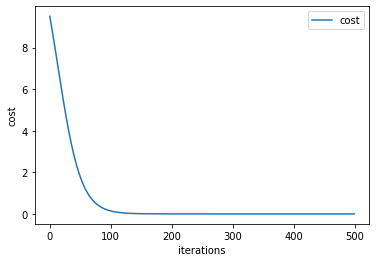

In [12]:
df = pd.read_csv("./../data/01_data_mars_opposition.csv")

df['log_Angle_With_Sun']=df['ZodiacIndex']*30+df['Degree']+df['Minute']/60+df['Second']/3600

alpha = df.iloc[:,7].values
phi = np.zeros(12)
theta = df.iloc[:,13].values
# r is taken fron 2_(ii)
#Function which calculates LatDegreewithsun

r=1.57732092
for i in range (12):
    phi[i]= math.degrees(math.atan((r-1)*math.tan(alpha[i]*np.pi/180)/r))

#x,y,z coordinates of mars is calculated     
    
M_x = np.zeros(12)
M_y = np.zeros(12)
M_z = np.zeros(12)
for i in range(12):
    M_x[i] = r*math.cos( phi[i]*np.pi/180)*math.cos( theta[i]*np.pi/180)
    M_y[i] = r*math.cos( phi[i]*np.pi/180)*math.sin( theta[i]*np.pi/180)
    M_z[i] = r*math.sin( phi[i]*np.pi/180)
    
def objective(x0):
    A, B, C = x0
    s = 0
    for i in range (12):
        s = s + (A*M_x[i]+B*M_y[i]+C*M_z[i])**2
        
    loss = s/(A**2+B**2+C**2)
    return loss

#minimization is done scipy.optimize.minimize
    
x0 = [0.5,0.5,0.5]
#args=(M_x, M_y, M_z)
par = minimize(objective,x0)

print ("parametre from scipy.optimize.minimize")
print (par.x)

#minimization using gradient_dedcent

cost = np.zeros(500)
def gradient_descent(M_x,M_y,M_z):
    A = B = C = 0.6
    iterations = 500

    learning_rate = 0.001

    for i in range(iterations):
        y_predicted = ((A*M_x+B*M_y+C*M_z)**2)/(A**2+B**2+C**2)
        cost[i] = sum([val for val in (y_predicted)])
        da = ((A**2+B**2+C**2)*(A*M_x+B*M_y+C*M_z)*(2*M_x)-((A*M_x+B*M_y+C*M_z)**2)*2*A)/((A**2+B**2+C**2)**2)
        db = ((A**2+B**2+C**2)*(A*M_x+B*M_y+C*M_z)*(2*M_y)-((A*M_x+B*M_y+C*M_z)**2)*2*B)/((A**2+B**2+C**2)**2)
        dc = ((A**2+B**2+C**2)*(A*M_x+B*M_y+C*M_z)*(2*M_z)-((A*M_x+B*M_y+C*M_z)**2)*2*C)/((A**2+B**2+C**2)**2)
        A = A - learning_rate*sum(da)
        B = B - learning_rate*sum(db)
        C = C - learning_rate*sum(dc)
       
    print ("parametre from gradient_descent")
    print ("A {}, B {}, C {}, iteration {}".format(A,B,C, i))

gradient_descent(M_x,M_y,M_z)
it = np.zeros(500)
for i in range (500):
    it[i] = i

#plotting cost funtion in gradient descent    

plt.plot(it, cost, label='cost')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.legend()
plt.show()

### <font color='red'>Function which calculates best fit ellipse and circle in the new plane</font>

radius of the circle 
[1.57603322]
semi major axis length
1.5327193099990848
semi minor axis length
1.5006689381767349
angle of rotation theta
-39.73907432367996


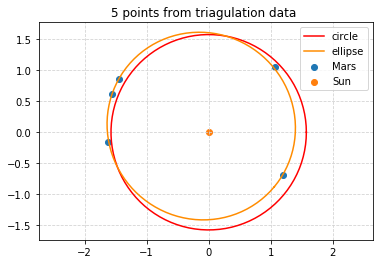

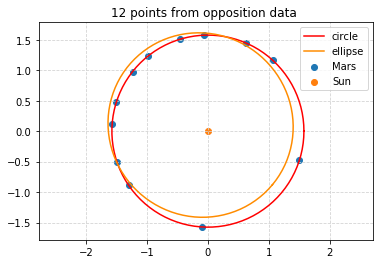

In [13]:
#Parameters are taken from 3(iii) 
#Mx ,My are taken from 2(i)


par = [ 0.022696535552149982, -0.020951750721414236 ,  1.0433553133497575]
M_x = [-1.45297367,  1.19567278,  1.07388531, -1.63230459, -1.55376733]
M_y = [ 0.86553353, -0.68685663,  1.05110693, -0.1485418 ,  0.62489899]
M_z = np.zeros(5)

#Mz is calculated using the best fit plane

for i in range (5):
    M_z[i] = (-1)*(par[0]*M_x[i]+par[1]*M_y[i])/par[2]
    
#12 points of mars is found using opposition data

df = pd.read_csv("./../data/01_data_mars_opposition.csv")
df['log_Angle_With_Sun']=df['ZodiacIndex']*30+df['Degree']+df['Minute']/60+df['Second']/3600
alpha = df.iloc[:,7].values
phi = np.zeros(12)
theta = df.iloc[:,13].values
r=1.57732092
for i in range (12):
    phi[i]= math.degrees(math.atan((r-1)*math.tan(alpha[i]*np.pi/180)/r))
M_x2 = np.zeros(12)
M_y2 = np.zeros(12)
M_z2 = np.zeros(12)
for i in range(12):
    M_x2[i] = r*math.cos( phi[i]*np.pi/180)*math.cos( theta[i]*np.pi/180)
    M_y2[i] = r*math.cos( phi[i]*np.pi/180)*math.sin( theta[i]*np.pi/180)
    M_z2[i] = r*math.sin( phi[i]*np.pi/180)
    
    

st = math.sin(1.25*np.pi/180)
sp = math.sin(1.15*np.pi/180)
ct = math.cos(1.25*np.pi/180)
cp = math.cos(1.15*np.pi/180)

#New coordinated are calcuted using transformation of x and y coordinatesto the best fit plane

M_xn = np.zeros(5)
M_yn = np.zeros(5)
M_xn2 = np.zeros(12)
M_yn2 = np.zeros(12)
for i in range (5):
    M_xn[i] = M_x[i]*cp+M_z[i]*sp
    M_yn[i] = M_x[i]*st*sp+M_y[i]*ct-M_z[i]*st*cp
for i in range (12):
    M_xn2[i] = M_x2[i]*cp+M_z2[i]*sp
    M_yn2[i] = M_x2[i]*st*sp+M_y2[i]*ct-M_z2[i]*st*cp
    
#loss function for best fit circle

def objective(r0):
    
    s=0
    for i in range(5):
        s=s+(r0-math.sqrt(M_yn[i]*M_yn[i]+M_xn[i]*M_xn[i]))**2
        
    
    return s
x0 = [2]
parc = minimize(objective,x0)

print ("radius of the circle ")
print (parc.x)

#loss function for best fit ellipse
 
D = np.zeros(5)
def objective2(x0):
    r,theta = x0
    s = 0
    for i in range(5):
        D[i] = math.sqrt(M_xn[i]**2+M_yn[i]**2)+math.sqrt((M_xn[i]-r*math.cos(theta*np.pi/180))**2+(M_yn[i]-r*math.sin(theta*np.pi/180))**2)
    for i in range(5):
        s = s + (np.mean(D)-D[i])**2
    return s

x0 = [1,30]
pare = minimize(objective2,x0)

#plotting the graph of best fit ellipse and circle and all the mars location 

u = (0+pare.x[0]*math.cos(pare.x[1]*np.pi/180))/2       #x-position of the center
v = (0+pare.x[0]*math.sin(pare.x[1]*np.pi/180))/2        #y-position of the center
a = np.mean(D)/2       #radius on the x-axis
b = math.sqrt(a**2-pare.x[0]**2)      #radius on the y-axis
t_rot = pare.x[1]*np.pi/180 #rotation angle

print ("semi major axis length")
print (a)
print ("semi minor axis length")
print (b)
print ("angle of rotation theta")
print (pare.x[1])

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[math.cos(t_rot) , -math.sin(t_rot)],[math.sin(t_rot) , math.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])

theta1 = np.linspace(0, 2*np.pi, 100)
r = parc.x
x1 = r*np.cos(theta1)
x2 = r*np.sin(theta1)

plt.plot(x1, x2,'red',label="circle") 
plt.title("5 points from triagulation data ")
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'darkorange',label="ellipse" )    #rotated ellipse
plt.grid(color='lightgray',linestyle='--')
plt.scatter(M_xn,M_yn,label="Mars") 
plt.scatter(0,0,label='Sun')
plt.axis("equal")
plt.legend()
plt.show()


plt.plot(x1, x2,'red',label="circle") 
plt.title("12 points from opposition data ")
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'darkorange',label="ellipse" )    #rotated ellipse
plt.grid(color='lightgray',linestyle='--')
plt.scatter(M_xn2,M_yn2,label="Mars") 
plt.scatter(0,0,label='Sun')
plt.axis("equal")
plt.legend()
plt.show()

In [14]:
pare

      fun: 0.0002776173636838367
 hess_inv: array([[2.67782402e-01, 3.84710010e+01],
       [3.84710010e+01, 1.51982537e+04]])
      jac: array([2.20439688e-07, 3.25235305e-09])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 24
     njev: 25
   status: 0
  success: True
        x: array([ -0.31180318, -39.73907432])